In [1]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [186]:
df = pd.read_csv('Diabetes Missing Data.csv')
dataframe  = pd.DataFrame(df)
print(df)
df.head()

     Pregnant  Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin   BMI  \
0           6    148.0          72.0       35.0            NaN  33.6   
1           1     85.0          66.0       29.0            NaN  26.6   
2           8    183.0          64.0        NaN            NaN  23.3   
3           1     89.0          66.0       23.0           94.0  28.1   
4           0    137.0          40.0       35.0          168.0  43.1   
..        ...      ...           ...        ...            ...   ...   
763        10    101.0          76.0       48.0          180.0  32.9   
764         2    122.0          70.0       27.0            NaN  36.8   
765         5    121.0          72.0       23.0          112.0  26.2   
766         1    126.0          60.0        NaN            NaN  30.1   
767         1     93.0          70.0       31.0            NaN  30.4   

     Diabetes_Pedigree  Age  Class  
0                0.627   50      1  
1                0.351   31      0  
2                0.672  

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [190]:
# --------------------------------------------  HANDLING MISSING VALUES -----------------------------------------

In [192]:
null = df.isnull().sum().sum()
null

652

In [196]:
#  Mean, Median, and Mode Imputation
Serum_Insulin = df['Serum_Insulin'].fillna(df['Serum_Insulin'].mean())
Diabetes_Pedigree = df['Diabetes_Pedigree'].fillna(df['Diabetes_Pedigree'].mean())
BMI = df['BMI'].fillna(df['BMI'].mean())
Skin_Fold = df['Skin_Fold'].fillna(df['Skin_Fold'].mean())
Diastolic_BP = df['Diastolic_BP'].fillna(df['Diastolic_BP'].mean())
Glucose = df['Glucose'].fillna(df['Glucose'].mean())
Pregnant = df['Pregnant'].fillna(df['Pregnant'].mean())

print(Serum_Insulin,Diabetes_Pedigree,BMI,Skin_Fold,Diastolic_BP,Glucose,Pregnant)

0      155.548223
1      155.548223
2      155.548223
3       94.000000
4      168.000000
          ...    
763    180.000000
764    155.548223
765    112.000000
766    155.548223
767    155.548223
Name: Serum_Insulin, Length: 768, dtype: float64 0      0.627
1      0.351
2      0.672
3      0.167
4      2.288
       ...  
763    0.171
764    0.340
765    0.245
766    0.349
767    0.315
Name: Diabetes_Pedigree, Length: 768, dtype: float64 0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64 0      35.00000
1      29.00000
2      29.15342
3      23.00000
4      35.00000
         ...   
763    48.00000
764    27.00000
765    23.00000
766    29.15342
767    31.00000
Name: Skin_Fold, Length: 768, dtype: float64 0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: Diastolic_BP, Length: 768, 

In [ ]:
#  ------------------------------------------- OUTLIERS DETECTION -------------------------------------------------

In [61]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [63]:
df.isnull().sum()


Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

In [65]:
df.describe()


,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


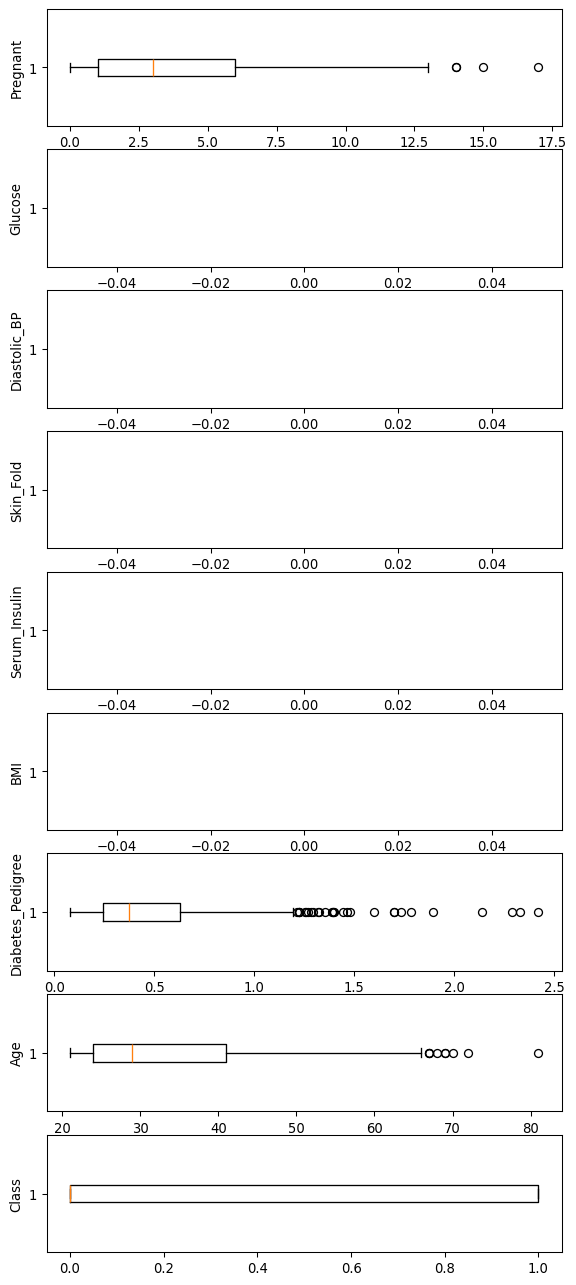

In [69]:

fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for col in df.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [87]:
q1, q3 = np.percentile(df['Pregnant'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = df[(df['Pregnant'] >= lower_bound) 
                & (df['Pregnant'] <= upper_bound)]
 
 
# Identify the quartiles
q1, q3 = np.percentile(clean_data['Glucose'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['Glucose'] >= lower_bound) 
                        & (clean_data['Glucose'] <= upper_bound)]
 
 





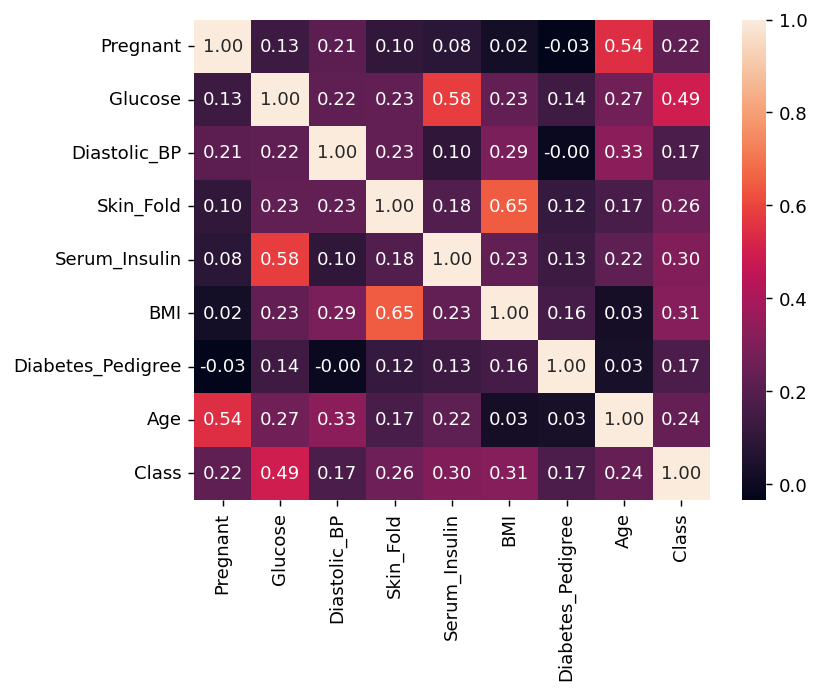

In [89]:
#correlation
corr = df.corr()

plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()


In [95]:


corr['Class'].sort_values(ascending = False)

Class                1.000000
Glucose              0.494650
BMI                  0.313680
Serum_Insulin        0.303454
Skin_Fold            0.259491
Age                  0.238356
Pregnant             0.221898
Diabetes_Pedigree    0.173844
Diastolic_BP         0.170589
Name: Class, dtype: float64

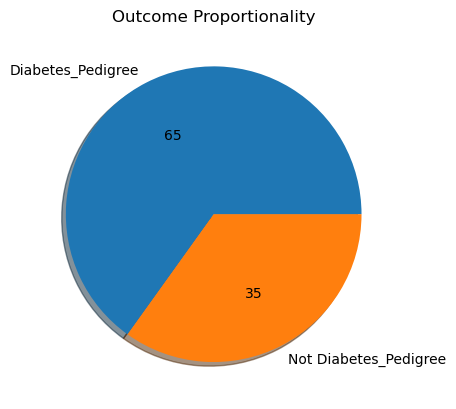

In [101]:
plt.pie(df.Class.value_counts(), 
		labels= ['Diabetes_Pedigree', 'Not Diabetes_Pedigree'], 
		autopct='%.f', shadow=True)
plt.title('Outcome Proportionality')
plt.show()


In [105]:
# separate array into input and output components
X = df.drop(columns =['Class'])
Y = df.Class


In [107]:
# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# learning the statistical parameters for each of the data and transforming
rescaledX = scaler.fit_transform(X)
rescaledX[:5]


array([[0.35294118, 0.67096774, 0.48979592, 0.30434783,        nan,
        0.31492843, 0.23441503, 0.48333333],
       [0.05882353, 0.26451613, 0.42857143, 0.23913043,        nan,
        0.17177914, 0.11656704, 0.16666667],
       [0.47058824, 0.89677419, 0.40816327,        nan,        nan,
        0.10429448, 0.25362938, 0.18333333],
       [0.05882353, 0.29032258, 0.42857143, 0.17391304, 0.09615385,
        0.20245399, 0.03800171, 0.        ],
       [0.        , 0.6       , 0.16326531, 0.30434783, 0.18509615,
        0.50920245, 0.94363792, 0.2       ]])

In [111]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
rescaledX[:5]

array([[ 0.63994726,  0.86228736, -0.03274557,  0.55855696,         nan,
         0.16509656,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.20222881, -0.51764464, -0.01465704,         nan,
        -0.84640379, -0.36506078, -0.19067191],
       [ 1.23388019,  2.0092408 , -0.67927766,         nan,         nan,
        -1.32325395,  0.60439732, -0.10558415],
       [-0.84488505, -1.07114842, -0.51764464, -0.58787104, -0.51884686,
        -0.62965372, -0.92076261, -1.04154944],
       [-1.14185152,  0.50181629, -2.61887393,  0.55855696,  0.10496753,
         1.53784703,  5.4849091 , -0.0204964 ]])

In [113]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : []
Numerical columns : ['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin', 'BMI', 'Diabetes_Pedigree', 'Age', 'Class']


In [115]:
df[cat_col].nunique()

Series([], dtype: float64)

In [117]:
df['Glucose'].unique()[:50]

array([148.,  85., 183.,  89., 137., 116.,  78., 115., 197., 125., 110.,
       168., 139., 189., 166., 100., 118., 107., 103., 126.,  99., 196.,
       119., 143., 147.,  97., 145., 117., 109., 158.,  88.,  92., 122.,
       138., 102.,  90., 111., 180., 133., 106., 171., 159., 146.,  71.,
       105., 101., 176., 150.,  73., 187.])

In [121]:
df1 = df.drop(columns=['Pregnant','Glucose'])
df1.shape

(768, 7)

In [123]:
round((df1.isnull().sum()/df1.shape[0])*100,2)

Diastolic_BP          4.56
Skin_Fold            29.56
Serum_Insulin        48.70
BMI                   1.43
Diabetes_Pedigree     0.00
Age                   0.00
Class                 0.00
dtype: float64

In [135]:
df2 = df1.drop(columns='Diabetes_Pedigree')
df2.dropna(subset=['Class'], axis=0, inplace=True)
df2.shape

(768, 6)

In [137]:
# Mean imputation
df3 = df2.fillna(df2.Age.mean())
# Let's check the null values again
df3.isnull().sum()

Diastolic_BP     0
Skin_Fold        0
Serum_Insulin    0
BMI              0
Age              0
Class            0
dtype: int64

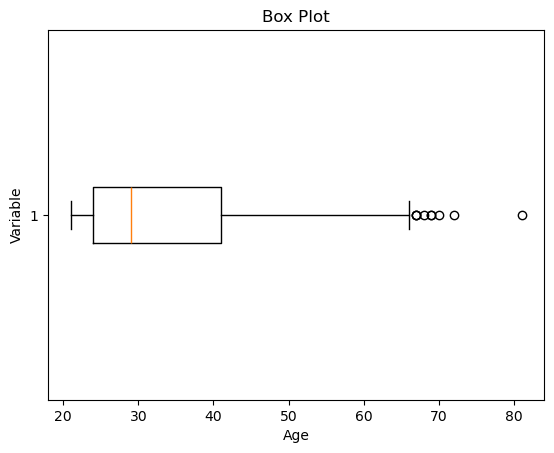

In [140]:

plt.boxplot(df3['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [142]:
# calculate summary statistics
mean = df3['Diastolic_BP'].mean()
std  = df3['Diastolic_BP'].std()

# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)

# Drop the outliers
df4 = df3[(df3['Diastolic_BP'] >= lower_bound) 
                & (df3['Diastolic_BP'] <= upper_bound)]

Lower Bound : 41.42277634547803
Upper Bound : 99.81792935656189


In [144]:
X = df3[['Skin_Fold','Serum_Insulin', 'BMI','Age','Class']]
Y = df3['Diastolic_BP']

In [148]:

# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Numerical columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
# learning the statistical parameters for each of the data and transforming
# x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

,Skin_Fold,Serum_Insulin,BMI,Age,Class
0,0.304348,0.023126,0.314928,0.483333,1.0
1,0.239130,0.023126,0.171779,0.166667,0.0
2,0.285227,0.023126,0.104294,0.183333,1.0
3,0.173913,0.096154,0.202454,0.000000,0.0
4,0.304348,0.185096,0.509202,0.200000,1.0


In [166]:
df = pd.DataFrame(df)
print("Sample DataFrame:")
print(df)

Sample DataFrame:
     Pregnant  Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin   BMI  \
0           6    148.0          72.0       35.0            NaN  33.6   
1           1     85.0          66.0       29.0            NaN  26.6   
2           8    183.0          64.0        NaN            NaN  23.3   
3           1     89.0          66.0       23.0           94.0  28.1   
4           0    137.0          40.0       35.0          168.0  43.1   
..        ...      ...           ...        ...            ...   ...   
763        10    101.0          76.0       48.0          180.0  32.9   
764         2    122.0          70.0       27.0            NaN  36.8   
765         5    121.0          72.0       23.0          112.0  26.2   
766         1    126.0          60.0        NaN            NaN  30.1   
767         1     93.0          70.0       31.0            NaN  30.4   

     Diabetes_Pedigree  Age  Class  
0                0.627   50      1  
1                0.351   31      0  
2     

In [ ]:
# ----------------------------------------  Normalize - feature-scaling -----------------------------------------------

In [172]:
max_vals = np.max(np.abs(df))
max_vals

846.0

In [174]:
print((df - max_vals) / max_vals)

     Pregnant   Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin       BMI  \
0   -0.992908 -0.825059     -0.914894  -0.958629            NaN -0.960284   
1   -0.998818 -0.899527     -0.921986  -0.965721            NaN -0.968558   
2   -0.990544 -0.783688     -0.924350        NaN            NaN -0.972459   
3   -0.998818 -0.894799     -0.921986  -0.972813      -0.888889 -0.966785   
4   -1.000000 -0.838061     -0.952719  -0.958629      -0.801418 -0.949054   
..        ...       ...           ...        ...            ...       ...   
763 -0.988180 -0.880615     -0.910165  -0.943262      -0.787234 -0.961111   
764 -0.997636 -0.855792     -0.917258  -0.968085            NaN -0.956501   
765 -0.994090 -0.856974     -0.914894  -0.972813      -0.867612 -0.969031   
766 -0.998818 -0.851064     -0.929078        NaN            NaN -0.964421   
767 -0.998818 -0.890071     -0.917258  -0.963357            NaN -0.964066   

     Diabetes_Pedigree       Age     Class  
0            -0.999259 -0.9408

In [176]:

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, 
                         columns=df.columns)
scaled_df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,0.352941,0.670968,0.489796,0.304348,NaN,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,NaN,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,NaN,NaN,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


In [222]:
dia = pd.read_csv('Diabetes.csv')
data = pd.DataFrame(dia)
print(data)

     pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0              6      148         72       35        0  33.6  0.627   50   
1              1       85         66       29        0  26.6  0.351   31   
2              8      183         64        0        0  23.3  0.672   32   
3              1       89         66       23       94  28.1  0.167   21   
4              0      137         40       35      168  43.1  2.288   33   
..           ...      ...        ...      ...      ...   ...    ...  ...   
763           10      101         76       48      180  32.9  0.171   63   
764            2      122         70       27        0  36.8  0.340   27   
765            5      121         72       23      112  26.2  0.245   30   
766            1      126         60        0        0  30.1  0.349   47   
767            1       93         70       31        0  30.4  0.315   23   

     diabetes  
0           1  
1           0  
2           1  
3           0  
4      

In [224]:
   
from sklearn.preprocessing import Normalizer
 
scaler = Normalizer()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data,
                         columns=df.columns)
print(scaled_df.head())

   Pregnant   Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin       BMI  \
0  0.033552  0.827612      0.402622   0.195719       0.000000  0.187890   
1  0.008424  0.716040      0.555984   0.244296       0.000000  0.224079   
2  0.040397  0.924085      0.323177   0.000000       0.000000  0.117657   
3  0.006612  0.588467      0.436392   0.152076       0.621527  0.185797   
4  0.000000  0.596381      0.174126   0.152360       0.731328  0.187620   

   Diabetes_Pedigree       Age     Class  
0           0.003506  0.279599  0.005592  
1           0.002957  0.261144  0.000000  
2           0.003393  0.161589  0.005050  
3           0.001104  0.138852  0.000000  
4           0.009960  0.143654  0.004353  


In [226]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data,
						columns=df.columns)
print(scaled_df.head())


   Pregnant   Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin       BMI  \
0  0.639947  0.862287     -0.032746   0.558557            NaN  0.165097   
1 -0.844885 -1.202229     -0.517645  -0.014657            NaN -0.846404   
2  1.233880  2.009241     -0.679278        NaN            NaN -1.323254   
3 -0.844885 -1.071148     -0.517645  -0.587871      -0.518847 -0.629654   
4 -1.141852  0.501816     -2.618874   0.558557       0.104968  1.537847   

   Diabetes_Pedigree       Age     Class  
0           0.468492  1.425995  1.365896  
1          -0.365061 -0.190672 -0.732120  
2           0.604397 -0.105584  1.365896  
3          -0.920763 -1.041549 -0.732120  
4           5.484909 -0.020496  1.365896  


652

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

In [228]:
   
from sklearn.preprocessing import RobustScaler
 
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data,
                         columns=df.columns)
print(scaled_df.head())

   Pregnant   Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin       BMI  \
0       0.6  0.738095         0.000   0.428571            NaN  0.142857   
1      -0.4 -0.761905        -0.375   0.000000            NaN -0.626374   
2       1.0  1.571429        -0.500        NaN            NaN -0.989011   
3      -0.4 -0.666667        -0.375  -0.428571      -0.272527 -0.461538   
4      -0.6  0.476190        -2.000   0.428571       0.378022  1.186813   

   Diabetes_Pedigree       Age  Class  
0           0.665359  1.235294    1.0  
1          -0.056209  0.117647    0.0  
2           0.783007  0.176471    1.0  
3          -0.537255 -0.470588    0.0  
4           5.007843  0.235294    1.0  


In [ ]:
# ------------------------------------ Split Data Into Training And Testing -------------------------------------------

In [232]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [233]:
from sklearn.model_selection import train_test_split


In [236]:

# Example data: 10 samples with 3 features
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15],
              [16, 17, 18], [19, 20, 21], [22, 23, 24], [25, 26, 27], [28, 29, 30]])

# Example target: 10 labels
y = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])


In [238]:
# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# View the resulting splits
print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)


X_train: [[16 17 18]
 [ 1  2  3]
 [22 23 24]
 [ 7  8  9]
 [28 29 30]
 [13 14 15]
 [10 11 12]
 [19 20 21]]
X_test: [[25 26 27]
 [ 4  5  6]]
y_train: [1 0 1 0 1 0 1 0]
y_test: [0 1]
